## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*



When time is : 0, get best_k: 52.97502371706534 best_b: 98.74809608007544, and the loss is: 168390.7245111372
When time is : 3, get best_k: 33.75402105277692 best_b: -21.24941931246414, and the loss is: 28684.558958980655
When time is : 4, get best_k: 5.144562703514623 best_b: 56.584373125007716, and the loss is: 4458.054766119335
When time is : 22, get best_k: 21.24174006151101 best_b: -76.34726056413608, and the loss is: 1314.511652760467
When time is : 27, get best_k: -16.36988933762902 best_b: 95.96614202964966, and the loss is: 1230.3059596719095
When time is : 43, get best_k: 4.482556620107928 best_b: -16.222992299283007, and the loss is: 166.14790175714697
When time is : 184, get best_k: 8.35946471641114 best_b: -26.93885683316286, and the loss is: 53.26354318883087
When time is : 196, get best_k: 7.444911106659589 best_b: -25.27269926708506, and the loss is: 45.98785316851293
When time is : 1920, get best_k: 7.591461364618411 best_b: -25.638797325426438, and the loss is: 44.938

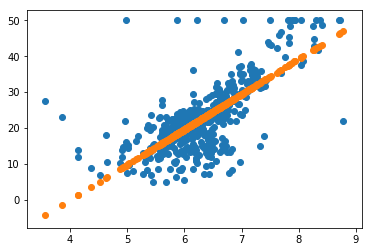

In [7]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import random

data = load_boston()
X, Y = data['data'], data['target']


def draw_rm_and_price(X, Y):
    plt.scatter(X[:, 5], Y)  # 房屋数量x 与 价格y
    # plt.show()


def price(rm, k, b):
    return k * rm + b


def loss_squared(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(y, y_hat)) / len(y)

#draw_rm_and_price(X, Y)

def radom_get_kb():
    X_rm = X[:, 5]
    trying_times = 20000

    min_loss = float('inf')
    best_k, best_b = None, None

    for i in range(trying_times):
        k = random.random() * 200 - 100
        b = random.random() * 200 - 100
        price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

        current_loss = loss_squared(Y, price_by_random_k_and_b)

        if current_loss < min_loss:
            min_loss = current_loss
            best_k, best_b = k, b
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

    price_by_random_k_and_b = [price(r, best_k, best_b) for r in X_rm]
    draw_rm_and_price(X, Y)
    plt.scatter(X_rm, price_by_random_k_and_b)
    plt.show()

radom_get_kb()

###### 2.Supervised Direction to get optimal *k* and *b*


When time is : 1, get best_k: -61.801750677995095 best_b: 52.51116796126604, and the loss is: 130987.63526282043
When time is : 3, get best_k: -59.801750677995095 best_b: 50.51116796126604, and the loss is: 123385.0405025355
When time is : 5, get best_k: -57.801750677995095 best_b: 48.51116796126604, and the loss is: 116009.80618884302
When time is : 7, get best_k: -55.801750677995095 best_b: 46.51116796126604, and the loss is: 108861.93232174363
When time is : 9, get best_k: -53.801750677995095 best_b: 44.51116796126604, and the loss is: 101941.41890123709
When time is : 11, get best_k: -51.801750677995095 best_b: 42.51116796126604, and the loss is: 95248.26592732352
When time is : 13, get best_k: -49.801750677995095 best_b: 40.51116796126604, and the loss is: 88782.47340000275
When time is : 15, get best_k: -47.801750677995095 best_b: 38.51116796126604, and the loss is: 82544.04131927485
When time is : 17, get best_k: -45.801750677995095 best_b: 36.51116796126604, and the loss is: 76

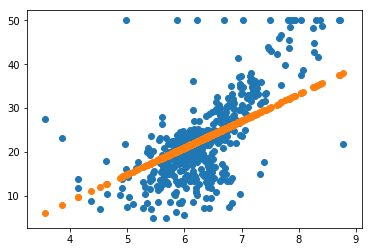

In [8]:
def direction_get_kb():
    X_rm = X[:, 5]
    trying_times = 20000
    min_loss = float('inf')
    best_k = random.random() * 200 - 100
    best_b = random.random() * 200 - 100
    direction = [
        (+1, -1),  # first element: k's change direction, second element: b's change direction
        (+1, +1),
        (-1, -1),
        (-1, +1),
    ]
    next_direction = random.choice(direction)
    scalar = 1
    update_time = 0
    for i in range(trying_times):
        k_direction, b_direction = next_direction
        if i > 10000:
            scalar = 0.1
        current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
        price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
        current_loss = loss_squared(Y, price_by_k_and_b)
        if current_loss < min_loss:  # performance became better
            min_loss = current_loss
            best_k, best_b = current_k, current_b
            next_direction = next_direction
            update_time += 1
            if update_time % 2 == 0:
                print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b,
                                                                                                      min_loss))
        else:
            next_direction = random.choice(direction)

    price_by_random_k_and_b = [price(r, best_k, best_b) for r in X_rm]
    draw_rm_and_price(X, Y)
    plt.scatter(X_rm, price_by_random_k_and_b)
    plt.show()

direction_get_kb()

###### 3.Gradient Descent to get optimal *k* and *b*


###### 4. Try different Loss function and learning rate. 

When time is : 2, get best_k: 23.351352561997203 best_b: -80.67125953819006, and the loss is: 43.76091271652833
When time is : 4, get best_k: 21.351352561997203 best_b: -82.67125953819006, and the loss is: 29.40554112914104
When time is : 6, get best_k: 19.351352561997203 best_b: -84.67125953819006, and the loss is: 15.478778721568137
When time is : 8, get best_k: 17.351352561997203 best_b: -86.67125953819006, and the loss is: 5.992049672213236


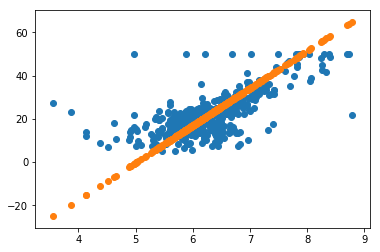

In [9]:
def loss_abs(y, y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(y, y_hat)) / len(y)


def direction_abs_get_kb():
    X_rm = X[:, 5]
    trying_times = 20000
    min_loss = float('inf')
    best_k = random.random() * 200 - 100
    best_b = random.random() * 200 - 100
    direction = [
        (+1, -1),  # first element: k's change direction, second element: b's change direction
        (+1, +1),
        (-1, -1),
        (-1, +1),
    ]
    next_direction = random.choice(direction)
    scalar = 1
    update_time = 0
    for i in range(trying_times):
        k_direction, b_direction = next_direction
        if i >2000:
            scalar = 0.1
        current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
        price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
        current_loss = loss_abs(Y, price_by_k_and_b)
        if current_loss < min_loss:  # performance became better
            min_loss = current_loss
            best_k, best_b = current_k, current_b
            next_direction = next_direction
            update_time += 1
            if update_time % 2 == 0:
                print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b,
                                                                                                      min_loss))
        else:
            next_direction = random.choice(direction)

    price_by_random_k_and_b = [price(r, best_k, best_b) for r in X_rm]
    draw_rm_and_price(X, Y)
    plt.scatter(X_rm, price_by_random_k_and_b)
    plt.show()

direction_abs_get_kb()

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans:当遇到的情况复杂时，需要复杂的公式来进行拟合，然而当公式足够复杂时将会很难进行求解，因此需要机器学习来不断逼近最终结果。

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:每次选择的前进方向是随机的，当搜索空间越大的时候，命中正确方向的概率越低，效率将会变得越低。

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:比第一种要好。速率固定，过小调整几乎没有效果，也容易掉入不正确的解，过大造成不断震荡。并且当前进方向需要调整的时候，依然使用的是随机策略。

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:通过梯度可以不断判断函数正确的前进方向

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:梯度是损失函数对某个参数的偏导数。下降是梯度的反方向。

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:每次参数的调整，可以根据梯度的计算，选择正确的方向。

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:通过数据，自动得出函数并调整函数的参数。

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

In [2]:

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import ttfFontProperty
import numpy as np
import pandas as pd
import networkx as nx
import requests
from bs4 import BeautifulSoup
from collections import defaultdict
from collections import deque
import re


def get_coord_information():
    subway_coord_csv = pd.read_csv("./data/北京地铁经纬度信息.csv", encoding='GBK', low_memory=False)
    subway_station_list = subway_coord_csv['站名'].tolist()
    subway_coord_list = subway_coord_csv['经纬度'].tolist()
    subway_line_list = subway_coord_csv['线路'].tolist()
    #print(subway_station_list)
    subway_coord_lib = {}
    for index, station in enumerate(subway_station_list):
        long, lat = [coord.strip() for coord in subway_coord_list[index].split(',')]
        subway_coord_lib[station] = (float(long), float(lat))
    #print(subway_coord_lib)
    return subway_coord_lib


def draw_beijing_subway_graph(subway_coord_lib):
    subway_graph = nx.Graph()
    subway_graph.add_nodes_from(list(subway_coord_lib.keys()))
    nx.draw(subway_graph, subway_coord_lib, with_labels=True, node_size=20)
    #zhfont1 = matplotlib.font_manager.FontProperties(fname='E:/CloudStationBackup/PyCharm/NLP-ClassFile/nlpcourse/NLP/Lesson02/data/simsun.ttc')
    #plt.xlabel(u'中文字体', fontproperties=zhfont1)
    matplotlib.rcParams['font.sans-serif'] = ['SimHei']
    matplotlib.rcParams['font.family'] = 'sans-serif'
    #plt.figure(figsize=(5, 5), dpi=8)
    plt.show()

def get_line_information():
    line_dict = {}
    req = requests.Session()
    req.headers['User-Agent'] = 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.25 Safari/537.36 Core/1.70.3704.400 QQBrowser/10.4.3587.400'
    redata = requests.get(url='https://www.bjsubway.com/station/xltcx/', verify=False)
    redata.encoding = 'gbk'
    pageSoup = BeautifulSoup(redata.text, 'lxml')
    line_name = ''
    line_dict = defaultdict(list)
    for line_info in pageSoup.find_all('div'):
        if line_name == '':
            # print(line_info.get('class'))
            if line_info.get('class') == ['subway_num1']:
                line_name = line_info.get_text()
        else:
            if line_info.get('class') == ['station']:
                line_dict[line_name] = line_dict[line_name] + [line_info.get_text()]
            else:
                if line_info.get('class') == ['other']:
                    break
                line_name = line_info.get_text()
    # print(line_dict)
    return line_dict


def deal_special_line(line_dict):
    line_dict['14号线西段'] = line_dict['14号线'][:7]
    line_dict['14号线东段'] = ['善各庄', '来广营', '东湖渠', '望京', '阜通', '望京南', '将台', '东风北桥', '枣营', '朝阳公园', '金台路', '大望路', '九龙山', '平乐园', '北工大西门', '十里河', '方庄', '蒲黄榆', '景泰', '永定门外', '北京南站']
    line_dict['8号线北段'] = line_dict['8号线'][:19]
    line_dict['8号线南段'] = line_dict['8号线'][19:]
    line_dict.pop('14号线')
    line_dict.pop('8号线')
    return line_dict


# 打印没有坐标信息的站名
def check_nocoord_station(subway_coord_lib, line_dict):
    for line, stations in line_dict.items():
        for station in stations:
            print("line:" + str(line) + "  station:" + station)
            if station not in subway_coord_lib:
                print(station)


def transform_station_format(line_dict):
    station_dict = defaultdict(list)
    for line, station in line_dict.items():
        for seq, station_name in enumerate(station):
            if seq > 0:
                station_dict[station_name].append(station[seq-1])
            if seq < len(station)-1:
                station_dict[station_name].append(station[seq+1])
    return station_dict


def bfs_search(start, destination, connection_grpah):
    pathes = [[start]]
    visitied = set()
    while pathes:  # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        if froninter in visitied: continue
        successors = connection_grpah[froninter]
        for city in successors:
            if city in path: continue  # eliminate loop
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination: return new_path
        visitied.add(froninter)
    print('终点不可达')


def dfs_search(start, destination, connection_grpah):
    pathes = [[start]]
    visitied = set()
    while pathes:  # if we find existing pathes
        path = pathes.pop()
        froninter = path[-1]
        if froninter in visitied: continue
        successors = connection_grpah[froninter]
        for city in successors:
            if city in path: continue  # eliminate loop
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination: return new_path
        visitied.add(froninter)
    print('终点不可达')


def leaststation_search(start, destination, connection_grpah):
    pathes = [[start]]
    visitied = set()
    while pathes:  # if we find existing pathes
        path = pathes.pop()
        froninter = path[-1]
        if froninter in visitied: continue
        successors = connection_grpah[froninter]
        for city in successors:
            if city in path: continue  # eliminate loop
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination: return new_path
        visitied.add(froninter)
        pathes = sorted(pathes, key=len, reverse=True)  # 我们可以加一个排序函数 对我们的搜索策略进行控制
    print('终点不可达')


subway_coord_lib = get_coord_information()  # 获取坐标信息
# draw_beijing_subway_graph(subway_coord_lib)  #画图 存在不能放大的问题
line_dict = get_line_information()  # 获取线路信息
line_dict = deal_special_line(line_dict)  # 处理两条分段线路
# print(line_dict)
# check_nocoord_station(subway_coord_lib, line_dict)
station_dict = transform_station_format(line_dict)
# print(station_dict)
print(bfs_search("农大南路", "双井", station_dict))
print(dfs_search("农大南路", "双井", station_dict))
print(leaststation_search("农大南路", "双井", station_dict))


['农大南路', '西苑', '圆明园', '北京大学东门', '中关村', '海淀黄庄', '知春里', '知春路', '大钟寺', '西直门', '积水潭', '鼓楼大街', '什刹海', '南锣鼓巷', '东四', '朝阳门', '建国门', '永安里', '国贸', '双井']
['农大南路', '西苑', '圆明园', '北京大学东门', '中关村', '海淀黄庄', '知春里', '知春路', '五道口', '上地', '西二旗', '生命科学园', '朱辛庄', '育知路', '平西府', '回龙观东大街', '霍营', '育新', '西小口', '永泰庄', '林萃桥', '森林公园南门', '奥林匹克公园', '奥体中心', '北土城', '安华桥', '安德里北街', '鼓楼大街', '什刹海', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台夕照', '国贸', '双井']
['农大南路', '西苑', '圆明园', '北京大学东门', '中关村', '海淀黄庄', '知春里', '知春路', '大钟寺', '西直门', '积水潭', '鼓楼大街', '什刹海', '南锣鼓巷', '东四', '朝阳门', '建国门', '永安里', '国贸', '双井']


d:\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)